<a href="https://colab.research.google.com/github/shivhub09/LSTM_STOCK_PRICE_PREDICTION/blob/main/STOCK_PRICE_PREDICTION_BHEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
from datetime import datetime

In [ ]:
df = yf.download("BHEL.NS", )

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df.to_csv('BHEL.csv')

In [ ]:
import pandas as pd

In [ ]:
# end = datetime.now()
# start = datetime(end.year - 5, end.month - 1, end.day-3)

In [ ]:
# df = yf.download("BHEL.NS" , start=start, end=end)
df = yf.download("BHEL.NS")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,5.733333,5.883333,5.733333,5.883333,4.559365,1501500
1996-01-02,5.883333,5.616666,5.616666,5.616666,4.352707,1500
1996-01-03,5.616666,5.700000,5.603333,5.700000,4.417287,4500
1996-01-04,5.700000,5.600000,5.600000,5.600000,4.339791,1500
1996-01-05,5.600000,5.700000,5.533333,5.700000,4.417287,1438500


In [ ]:
df.shape

(7075, 6)

In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-21,232.000000,232.350006,220.050003,221.899994,221.899994,22193528
2024-02-22,224.000000,229.399994,220.949997,228.500000,228.500000,25023398
2024-02-23,229.449997,233.750000,228.500000,229.600006,229.600006,21463226
2024-02-26,229.800003,232.149994,226.250000,228.050003,228.050003,14288582
2024-02-27,228.050003,228.399994,221.750000,222.600006,222.600006,22492044


In [ ]:
df1=df.reset_index()['Close']

In [ ]:
df1

0         5.883333
1         5.616666
2         5.700000
3         5.600000
4         5.700000
           ...    
7070    221.899994
7071    228.500000
7072    229.600006
7073    228.050003
7074    222.600006
Name: Close, Length: 7075, dtype: float64

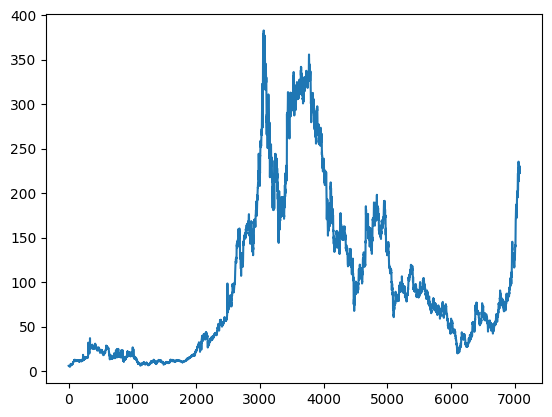

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [ ]:
import numpy as np

In [ ]:
df1

0         5.883333
1         5.616666
2         5.700000
3         5.600000
4         5.700000
           ...    
7070    221.899994
7071    228.500000
7072    229.600006
7073    228.050003
7074    222.600006
Name: Close, Length: 7075, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.00198644]
 [0.00128015]
 [0.00150087]
 ...
 [0.59451922]
 [0.5904139 ]
 [0.57597912]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(5306, 1769)

In [ ]:
train_data

array([[0.00198644],
       [0.00128015],
       [0.00150087],
       ...,
       [0.19714306],
       [0.19608362],
       [0.20040966]])

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(5205, 100)
(5205,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(1668, 100)
(1668,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(units=100))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(units=1))

# Compile the model with a custom learning rate
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mean_squared_error')
# Display the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 100)          40800     
                                                                 
 dropout_6 (Dropout)         (None, 100, 100)          0         
                                                                 
 batch_normalization_6 (Bat  (None, 100, 100)          400       
 chNormalization)                                                
                                                                 
 lstm_7 (LSTM)               (None, 100, 100)          80400     
                                                                 
 dropout_7 (Dropout)         (None, 100, 100)          0         
                                                                 
 batch_normalization_7 (Bat  (None, 100, 100)          400       
 chNormalization)                                     

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 100)          40800     
                                                                 
 dropout_6 (Dropout)         (None, 100, 100)          0         
                                                                 
 batch_normalization_6 (Bat  (None, 100, 100)          400       
 chNormalization)                                                
                                                                 
 lstm_7 (LSTM)               (None, 100, 100)          80400     
                                                                 
 dropout_7 (Dropout)         (None, 100, 100)          0         
                                                                 
 batch_normalization_7 (Bat  (None, 100, 100)          400       
 chNormalization)                                     

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 100)          40800     
                                                                 
 dropout_6 (Dropout)         (None, 100, 100)          0         
                                                                 
 batch_normalization_6 (Bat  (None, 100, 100)          400       
 chNormalization)                                                
                                                                 
 lstm_7 (LSTM)               (None, 100, 100)          80400     
                                                                 
 dropout_7 (Dropout)         (None, 100, 100)          0         
                                                                 
 batch_normalization_7 (Bat  (None, 100, 100)          400       
 chNormalization)                                     

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
82/82 [==============================] - 15s 90ms/step - loss: 0.6519 - val_loss: 0.0104
Epoch 2/100
82/82 [==============================] - 3s 33ms/step - loss: 0.4132 - val_loss: 0.0103
Epoch 3/100
82/82 [==============================] - 3s 41ms/step - loss: 0.3387 - val_loss: 0.0129
Epoch 4/100
82/82 [==============================] - 3s 36ms/step - loss: 0.2810 - val_loss: 0.0088
Epoch 5/100
82/82 [==============================] - 2s 22ms/step - loss: 0.2309 - val_loss: 0.0070
Epoch 6/100
82/82 [==============================] - 2s 25ms/step - loss: 0.1945 - val_loss: 0.0159
Epoch 7/100
82/82 [==============================] - 2s 21ms/step - loss: 0.1567 - val_loss: 0.0015
Epoch 8/100
82/82 [==============================] - 2s 19ms/step - loss: 0.1300 - val_loss: 0.0021
Epoch 9/100
82/82 [==============================] - 2s 21ms/step - loss: 0.1037 - val_loss: 0.0015
Epoch 10/100
82/82 [==============================] - 2s 23ms/step - loss: 0.0863 - val_loss: 0.002

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.15.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

53/53 [==============================] - 1s 11ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

150.28495816897905

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

77.84981266850812

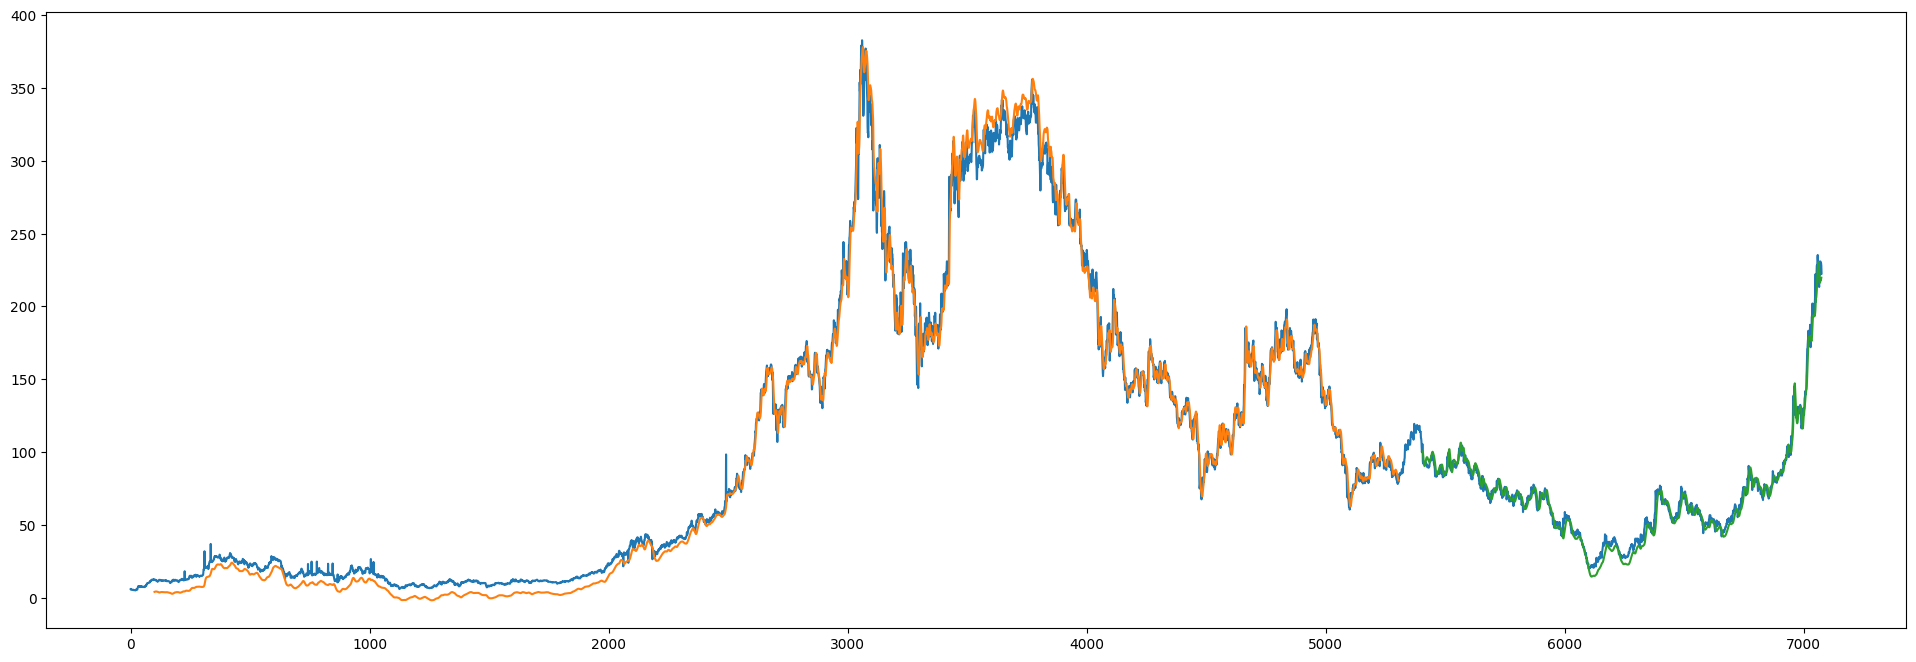

In [ ]:
### Plotting
# shift train predictions for plotting
plt.figure(figsize=(24,8))
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

array([219.75250244])

In [ ]:
len(test_data)

1769

In [ ]:
test_data.shape

(1769, 1)

In [ ]:
x_input=test_data[1669:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
len(temp_input)

100

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.56755453]
101
1 day input [0.32423104 0.32383375 0.32780661 0.32131758 0.33389836 0.33297138
 0.33244163 0.32634992 0.33376592 0.33720909 0.32860119 0.32860119
 0.31800685 0.29827489 0.29443445 0.29853975 0.29801004 0.30608821
 0.3064855  0.30833953 0.32555533 0.32701206 0.3308525  0.32793904
 0.31827172 0.31959601 0.32820392 0.34793587 0.35031958 0.35363032
 0.36210582 0.35972207 0.35614651 0.36025178 0.36448953 0.3896511
 0.39971573 0.423553   0.43785535 0.43798779 0.44739027 0.45440901
 0.45904403 0.47188969 0.45440901 0.46222233 0.4575873  0.46222233
 0.46685735 0.46725467 0.48274887 0.47573013 0.44196067 0.46434121
 0.45864676 0.46897623 0.46831408 0.49652155 0.49903769 0.51122116
 0.52141824 0.50128897 0.50301057 0.50499701 0.50327541 0.5044673
 0.51519404 0.51016175 0.50671858 0.5194318  0.52406682 0.53492604
 0.54830136 0.5750521  0.52393438 0.54234205 0.5688279  0.57253595
 0.59014903 0.59094361 0.58895717 0.60564327 0.60961615 0.6003461
 0.59968395 0.59769751 0.58908961 0.

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

7075

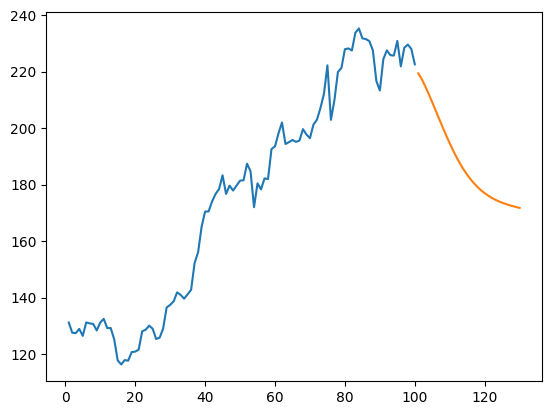

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[6975:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

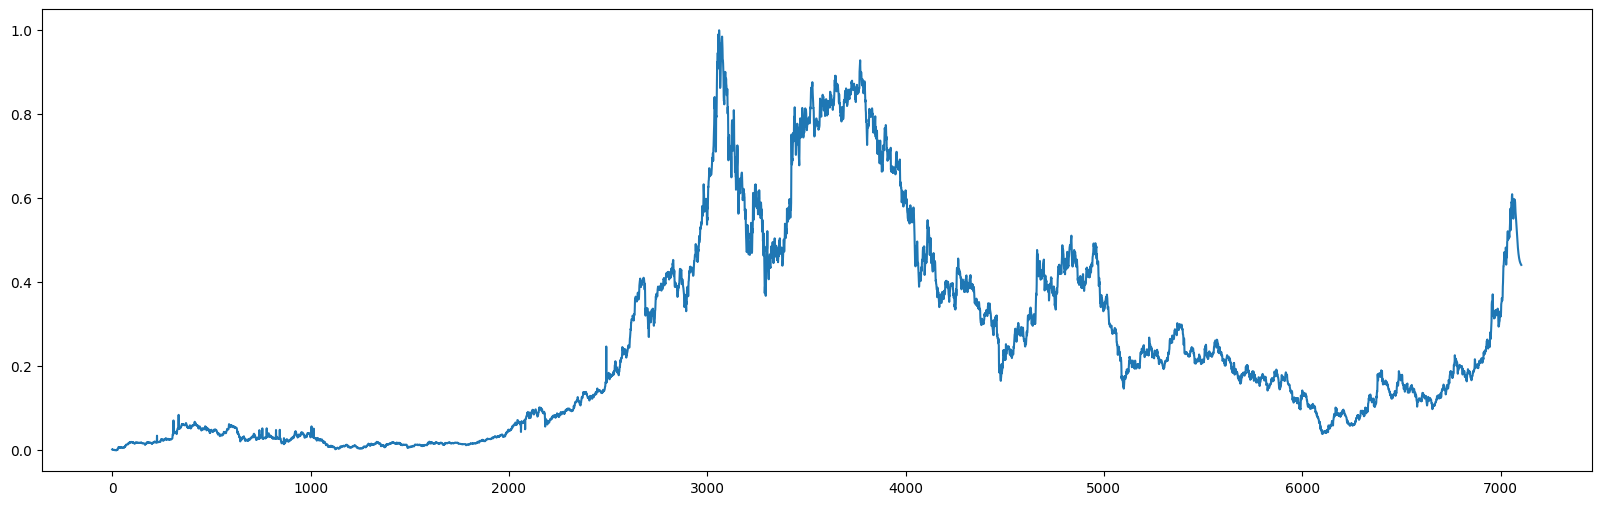

In [ ]:
plt.figure(figsize=(20,6))
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3)

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

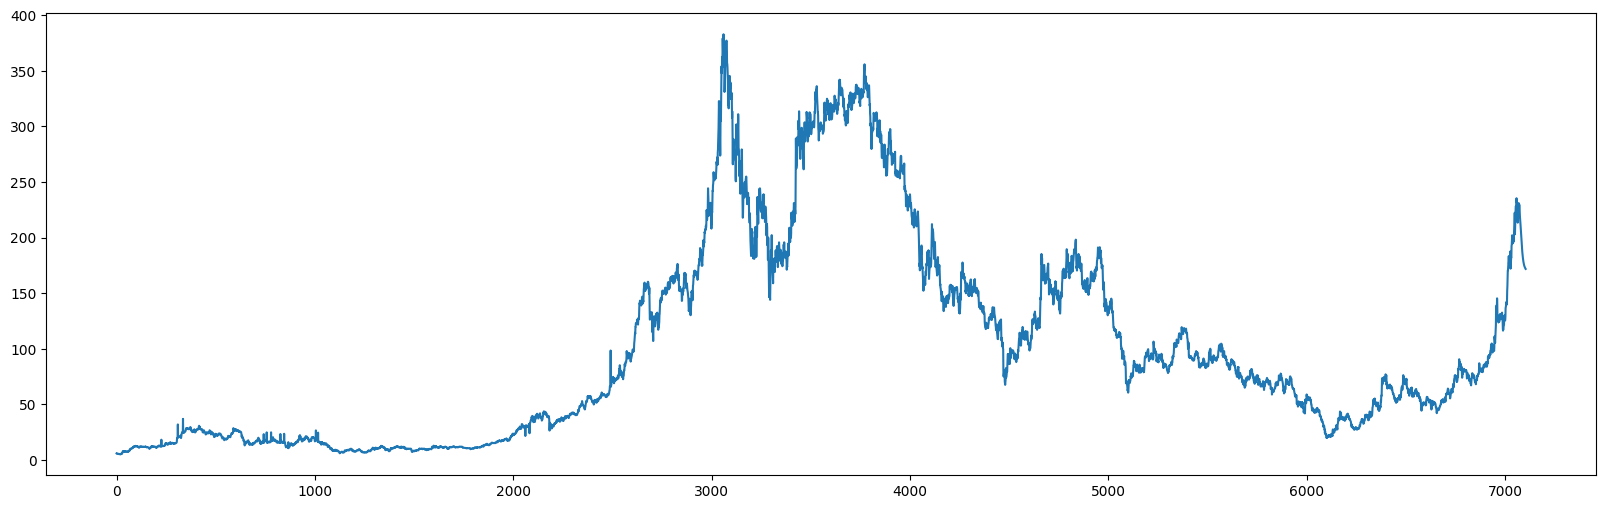

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(df3)

In [ ]:
ytest.shape

(1668,)

In [ ]:
ytest[0]

0.2343115432961855

In [ ]:
test_predict.shape

(1668, 1)

In [ ]:
test_predict.shape

(1668, 1)

In [ ]:
ytest[-1]

0.5904139008717724

In [ ]:
original_value = scaler.inverse_transform([[ytest[339]]])[0, 0]

In [ ]:
original_value

74.1500015258789

In [ ]:
len(df3)

7105

In [ ]:
df1.shape

(7075, 1)

In [ ]:
len(df3)

7105

In [ ]:
df1[7074]

array([0.57597912])

In [ ]:
df3[7075]

[219.4192203993333]

In [ ]:
testPredictPlot[7073]

array([219.75250244])